In [75]:
import functions_model_analysis as f

import pandas as pd
import sys 
 
sys.path.insert(0, '../AWS_Scripts')
from functions_training_pipeline import Model

In [77]:
LR = f.load_object('LinearRegression')

In [81]:
LR.cv_model_list

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [9]:
[(a, b) for a, b in zip(LR.columns, LR.cv_model_list[0].coef_)]

[('x', 0.10252786062471916),
 ('y', -0.018987710360833854),
 ('mw_value', -0.0370410653158838),
 ('mean_3', -0.024980156018477105),
 ('mean_9', 0.3982694143113037),
 ('sum_5', -0.1958548356322259),
 ('mw_value_yesterday', 0.041425893058854524),
 ('mw_value_7_day_average', 0.052565178104781146),
 ('hours_of_daylight', 0.04796802558156488),
 ('elevation_data', -0.13268677834683026),
 ('slope_data', -1.2855468096923652),
 ('aspect_data', -0.006862968582951294),
 ('distance_to_margin', -0.1724154451290388)]

In [82]:
EN = f.load_object('ElasticNetRegression')

In [80]:
[(a, b) for a, b in zip(EN.columns, EN.cv_model_list[0].coef_)]

[('x', 0.0),
 ('y', -0.0),
 ('mw_value', 0.0),
 ('mean_3', 0.0),
 ('mean_9', 0.0),
 ('sum_5', 0.0),
 ('mw_value_yesterday', 0.0),
 ('mw_value_7_day_average', 0.0),
 ('hours_of_daylight', 0.0),
 ('elevation_data', -0.0),
 ('slope_data', -0.0),
 ('aspect_data', -0.0),
 ('distance_to_margin', -0.0)]

In [ ]:
EN.cv_model_list[0].get_params()

In [29]:
# import models:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import numpy as np

In [85]:
def feature_importance_dict(model, columns):
    """
    Function to plot feature importance.
    """
    # columns = model.columns
    # model = model.cv_model_list[0]

    if isinstance(model, DecisionTreeRegressor):
        feature_importance = model.feature_importances_
    elif isinstance(model, RandomForestRegressor):
        feature_importance = model.feature_importances_
    elif isinstance(model, GradientBoostingRegressor):
        feature_importance = model.feature_importances_
    elif isinstance(model, LinearRegression):
        feature_importance = model.coef_
    elif isinstance(model, Ridge):
        feature_importance = np.abs(model.coef_)
    elif isinstance(model, Lasso):
        feature_importance = np.abs(model.coef_)
    elif isinstance(model, ElasticNet):
        feature_importance = np.abs(model.coef_)
    else:
        print("model not supported")
        assert False

    feature_importance_dict = dict(zip(columns, feature_importance))

    return feature_importance_dict



In [177]:
def plot_feature_importance2(model):
    """ Plot mean feature importance over 5 cv models with std.
    """
    feature_importance_df = []
    for mod in model.cv_model_list:
        feature_importance = feature_importance_dict(mod, model.columns)
        if len(feature_importance_df) == 0:
            feature_importance_df = pd.DataFrame(feature_importance, index=[0])
        else:
            feature_importance_df = pd.concat([feature_importance_df, pd.DataFrame([feature_importance])], ignore_index=True)

    # sort features by mean importance in descending order by absolute value
    mean_importances = feature_importance_df.mean()
    mean_importances_abs = np.abs(mean_importances)
    sorted_index = mean_importances_abs.sort_values(ascending=False).index
    mean_importances = mean_importances[sorted_index]
    feature_names = mean_importances.index

    # assign colors to positive and negative features
    colors = ['red' if imp < 0 else 'green' for imp in mean_importances]

    # plot mean feature importance as bar plot with std
    fig, ax = plt.subplots()
    ax.bar(feature_names, mean_importances, yerr=feature_importance_df[sorted_index].std(), capsize=5, color=colors)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Mean Importance')
    ax.set_title('Feature Importance')
    ax.tick_params(axis='x', rotation=90)

    plt.show()


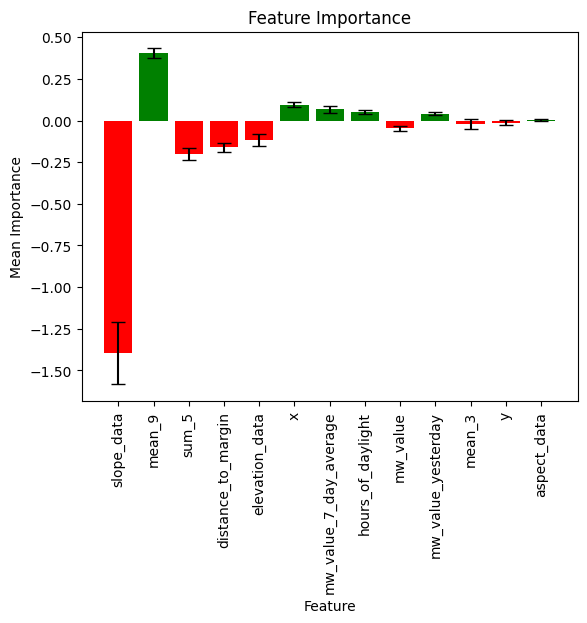

In [178]:
plot_feature_importance2(LR)